In [25]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

In [27]:
def load_dataset():
    '''
    Load training dataset
    '''
    Xtrain = []
    Ytrain = []
    with open('../input/training/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [28]:
# Load dataset
Xdata, Ydata = load_dataset()
Xtrain = Xdata[:]
Ytrain = Ydata[:]

In [29]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

In [ ]:
# Preview dataset samples
show_image(Xtrain[0], Ytrain[0])

In [30]:
# Configure Model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1) ))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(30))


In [31]:
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['mae'])

In [32]:
# Train model
model.fit(Xtrain, Ytrain, epochs=1000)

Epoch 1/1000
2140/2140 [==============================] - 5s 2ms/step - loss: 1408.4941 - mean_absolute_error: 24.0410
Epoch 2/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 331.8336 - mean_absolute_error: 14.3812
Epoch 3/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 272.5340 - mean_absolute_error: 12.8412
Epoch 4/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 236.5166 - mean_absolute_error: 11.9051
Epoch 5/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 189.3792 - mean_absolute_error: 10.5869
Epoch 6/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 177.3553 - mean_absolute_error: 10.1726
Epoch 7/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 145.7106 - mean_absolute_error: 9.2037
Epoch 8/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 120.2055 - mean_absolute_error: 8.3174
Epoch 9/1000
2140/2140 [==============================] -

Epoch 71/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 54.0520 - mean_absolute_error: 5.5445
Epoch 72/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 52.4951 - mean_absolute_error: 5.4918
Epoch 73/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 55.1484 - mean_absolute_error: 5.6166
Epoch 74/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 55.8947 - mean_absolute_error: 5.6391
Epoch 75/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 53.2240 - mean_absolute_error: 5.4783
Epoch 76/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 54.9435 - mean_absolute_error: 5.5665
Epoch 77/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 54.4206 - mean_absolute_error: 5.6023
Epoch 78/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 58.4606 - mean_absolute_error: 5.7759
Epoch 79/1000
2140/2140 [==============================] - 3s 2m

2140/2140 [==============================] - 3s 2ms/step - loss: 52.5668 - mean_absolute_error: 5.4962
Epoch 141/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 51.7639 - mean_absolute_error: 5.4026
Epoch 142/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 51.2274 - mean_absolute_error: 5.3755
Epoch 143/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 50.6329 - mean_absolute_error: 5.3440
Epoch 144/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 51.4038 - mean_absolute_error: 5.3760
Epoch 145/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 50.8933 - mean_absolute_error: 5.3907
Epoch 146/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 47.7457 - mean_absolute_error: 5.2062
Epoch 147/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 49.8780 - mean_absolute_error: 5.3192
Epoch 148/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 48.4645 - mean_absolute_error: 5.2365
Epoch 210/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 49.5459 - mean_absolute_error: 5.2781
Epoch 211/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 48.3719 - mean_absolute_error: 5.2234
Epoch 212/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 49.5233 - mean_absolute_error: 5.2697
Epoch 213/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 51.2436 - mean_absolute_error: 5.3765
Epoch 214/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 49.0752 - mean_absolute_error: 5.2820
Epoch 215/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 47.0800 - mean_absolute_error: 5.1515
Epoch 216/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 46.7919 - mean_absolute_error: 5.1369
Epoch 217/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 43.4885 - mean_absolute_error: 4.9369
Epoch 279/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 44.0501 - mean_absolute_error: 4.9381
Epoch 280/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 42.5392 - mean_absolute_error: 4.8526
Epoch 281/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 47.3319 - mean_absolute_error: 5.1321
Epoch 282/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 44.8215 - mean_absolute_error: 5.0244
Epoch 283/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 45.1904 - mean_absolute_error: 5.0151
Epoch 284/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 45.8999 - mean_absolute_error: 5.0730
Epoch 285/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 42.4042 - mean_absolute_error: 4.8747
Epoch 286/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 40.6455 - mean_absolute_error: 4.7590
Epoch 348/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 41.3504 - mean_absolute_error: 4.8031
Epoch 349/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 42.0711 - mean_absolute_error: 4.8407
Epoch 350/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 41.4851 - mean_absolute_error: 4.8352
Epoch 351/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 41.8187 - mean_absolute_error: 4.8454
Epoch 352/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 43.3329 - mean_absolute_error: 4.9329
Epoch 353/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 40.2624 - mean_absolute_error: 4.7323
Epoch 354/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 41.5297 - mean_absolute_error: 4.8274
Epoch 355/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 39.0421 - mean_absolute_error: 4.6577
Epoch 417/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 37.9378 - mean_absolute_error: 4.5867
Epoch 418/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 37.8614 - mean_absolute_error: 4.6095
Epoch 419/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 38.5784 - mean_absolute_error: 4.6245
Epoch 420/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 39.1106 - mean_absolute_error: 4.6552
Epoch 421/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 36.8804 - mean_absolute_error: 4.5603
Epoch 422/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 37.7352 - mean_absolute_error: 4.5573
Epoch 423/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 38.7293 - mean_absolute_error: 4.6152
Epoch 424/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 36.0558 - mean_absolute_error: 4.4664
Epoch 486/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 36.6740 - mean_absolute_error: 4.5165
Epoch 487/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 35.2378 - mean_absolute_error: 4.4306
Epoch 488/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 37.3395 - mean_absolute_error: 4.5309
Epoch 489/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 36.2802 - mean_absolute_error: 4.4799
Epoch 490/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 36.1021 - mean_absolute_error: 4.4513
Epoch 491/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 37.0734 - mean_absolute_error: 4.4962
Epoch 492/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 34.8592 - mean_absolute_error: 4.4031
Epoch 493/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 34.8273 - mean_absolute_error: 4.3845
Epoch 555/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 34.0335 - mean_absolute_error: 4.3276
Epoch 556/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 32.9995 - mean_absolute_error: 4.2528
Epoch 557/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 32.8551 - mean_absolute_error: 4.2657
Epoch 558/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 31.6031 - mean_absolute_error: 4.1765
Epoch 559/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 33.6552 - mean_absolute_error: 4.3098
Epoch 560/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 31.9137 - mean_absolute_error: 4.2158
Epoch 561/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 32.5656 - mean_absolute_error: 4.2486
Epoch 562/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 30.3285 - mean_absolute_error: 4.0968
Epoch 624/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 29.6819 - mean_absolute_error: 4.0501
Epoch 625/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 30.9406 - mean_absolute_error: 4.1111
Epoch 626/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 32.0469 - mean_absolute_error: 4.1748
Epoch 627/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 30.5068 - mean_absolute_error: 4.1058
Epoch 628/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 29.8358 - mean_absolute_error: 4.0725
Epoch 629/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 30.4750 - mean_absolute_error: 4.0712
Epoch 630/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 31.4803 - mean_absolute_error: 4.1632
Epoch 631/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 28.7819 - mean_absolute_error: 3.9650
Epoch 693/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 29.3106 - mean_absolute_error: 4.0190
Epoch 694/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 27.6337 - mean_absolute_error: 3.9071
Epoch 695/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 28.8999 - mean_absolute_error: 3.9699
Epoch 696/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 28.2766 - mean_absolute_error: 3.9350
Epoch 697/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 28.8240 - mean_absolute_error: 3.9688
Epoch 698/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 28.1850 - mean_absolute_error: 3.9267
Epoch 699/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.7743 - mean_absolute_error: 3.8391
Epoch 700/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 26.6024 - mean_absolute_error: 3.8150
Epoch 762/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.9434 - mean_absolute_error: 3.8372
Epoch 763/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.4315 - mean_absolute_error: 3.7876
Epoch 764/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 25.4947 - mean_absolute_error: 3.7340
Epoch 765/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.3256 - mean_absolute_error: 3.7958
Epoch 766/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.6563 - mean_absolute_error: 3.8284
Epoch 767/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.5472 - mean_absolute_error: 3.7881
Epoch 768/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 25.4830 - mean_absolute_error: 3.7479
Epoch 769/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 25.0112 - mean_absolute_error: 3.6872
Epoch 831/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 24.7730 - mean_absolute_error: 3.6669
Epoch 832/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 26.6118 - mean_absolute_error: 3.7799
Epoch 833/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 25.2443 - mean_absolute_error: 3.7218
Epoch 834/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 23.8828 - mean_absolute_error: 3.5954
Epoch 835/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 23.6577 - mean_absolute_error: 3.5966
Epoch 836/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 25.0925 - mean_absolute_error: 3.6944
Epoch 837/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 24.5194 - mean_absolute_error: 3.6633
Epoch 838/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 22.8170 - mean_absolute_error: 3.4951
Epoch 900/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 22.0061 - mean_absolute_error: 3.4443
Epoch 901/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 21.6206 - mean_absolute_error: 3.4259
Epoch 902/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 22.9309 - mean_absolute_error: 3.5306
Epoch 903/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 23.2122 - mean_absolute_error: 3.5343
Epoch 904/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 23.2528 - mean_absolute_error: 3.5399
Epoch 905/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 22.4388 - mean_absolute_error: 3.4810
Epoch 906/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 22.4518 - mean_absolute_error: 3.4951
Epoch 907/1000
2140/2140 [==============================] - 3s 2ms/step

2140/2140 [==============================] - 3s 2ms/step - loss: 20.0400 - mean_absolute_error: 3.2692
Epoch 969/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.0126 - mean_absolute_error: 3.2663
Epoch 970/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.5501 - mean_absolute_error: 3.3182
Epoch 971/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 19.8312 - mean_absolute_error: 3.2607
Epoch 972/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.3180 - mean_absolute_error: 3.3006
Epoch 973/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.6268 - mean_absolute_error: 3.3240
Epoch 974/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.4169 - mean_absolute_error: 3.2986
Epoch 975/1000
2140/2140 [==============================] - 3s 2ms/step - loss: 20.8726 - mean_absolute_error: 3.3394
Epoch 976/1000
2140/2140 [==============================] - 3s 2ms/step

In [33]:
# Load test data
def load_testset():
    Xtest = []
    with open('../input/test/test.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)
Xtest = load_testset()

In [34]:
# Preview results on test data
def show_results(image_index):
    Ypred = model.predict(Xtest[image_index:(image_index+1)])
    show_image(Xtest[image_index], Ypred[0])

# Epoch = 1000

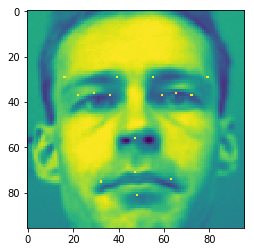

In [35]:
show_results(3)

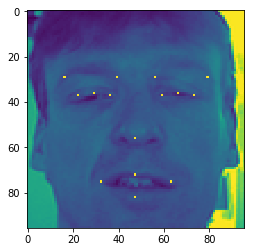

In [36]:
show_results(4)

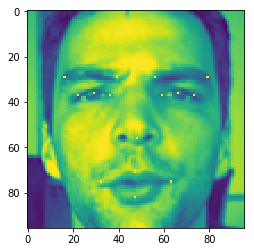

In [37]:
show_results(5)